 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

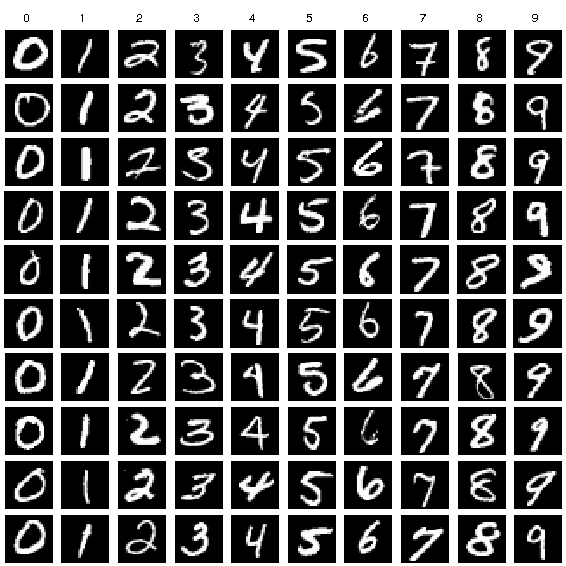

In [1]:
from IPython.display import display
from PIL import Image

image_path = "/content/sample_data/mnist_data_sample.png"
image = Image.open(image_path)
display(image)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping
###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

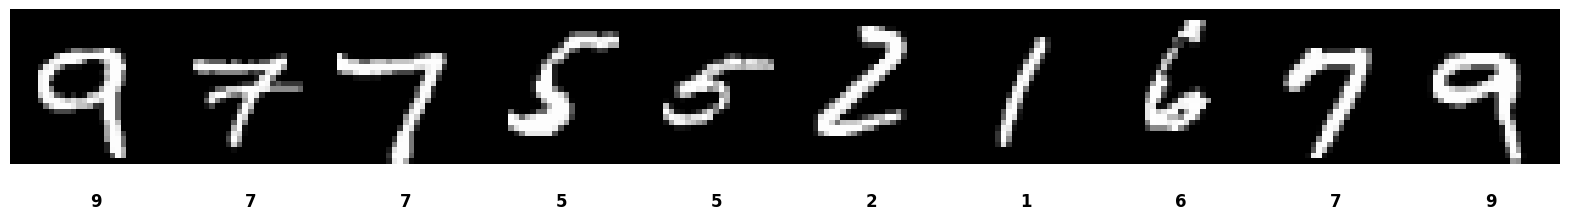

In [5]:
display_random_images(X_train, y_train)

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset? - **images as input and labels as targets (integers from 0 until 9)**
- How many data samples do we have in train and test datasets? - **60 000 and 10 000 for the test**
- How many colour channels does the input variable have? - **1 channel**
- What is the size of the input images? - **28 by 28**
- What is the necessary preprocessing of the input data X? - **same as last week (normalization)**
- How many classes do we have in target varoable? - **10 classes**
- What is the necessary preprocessing of target variable y? - **one hot encoding as last week**

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [7]:
###################################
#Normalize the images to a range of 0 to 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Reshape the data to add a channel dimension (for CNN input)
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

#one-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [8]:
model = Sequential()
###################################

#convolutionnal layer with 32 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

#MaxPooling layer to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten layer to prepare for the fully connected layers
model.add(Flatten())

#Fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

#output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

###################################
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [9]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

###################################
#compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

###################################


### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [10]:
###################################
history = model.fit(X_train, y_train, epochs=8, batch_size=100, validation_data=(X_test, y_test), verbose=2)

###################################

Epoch 1/8
600/600 - 34s - 56ms/step - accuracy: 0.9435 - loss: 0.1960 - val_accuracy: 0.9766 - val_loss: 0.0717
Epoch 2/8
600/600 - 36s - 60ms/step - accuracy: 0.9820 - loss: 0.0595 - val_accuracy: 0.9822 - val_loss: 0.0500
Epoch 3/8
600/600 - 41s - 69ms/step - accuracy: 0.9872 - loss: 0.0418 - val_accuracy: 0.9835 - val_loss: 0.0473
Epoch 4/8
600/600 - 41s - 68ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9849 - val_loss: 0.0469
Epoch 5/8
600/600 - 42s - 69ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.9845 - val_loss: 0.0465
Epoch 6/8
600/600 - 40s - 66ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9850 - val_loss: 0.0493
Epoch 7/8
600/600 - 41s - 68ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.9866 - val_loss: 0.0456
Epoch 8/8
600/600 - 41s - 68ms/step - accuracy: 0.9974 - loss: 0.0091 - val_accuracy: 0.9854 - val_loss: 0.0505


#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

Accuracy: 98.54
Loss: 5.05


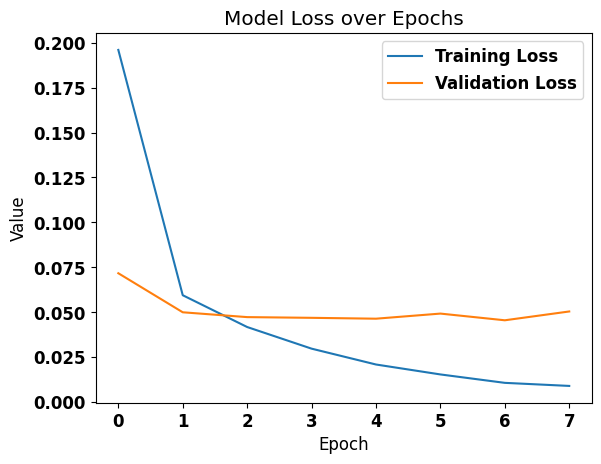

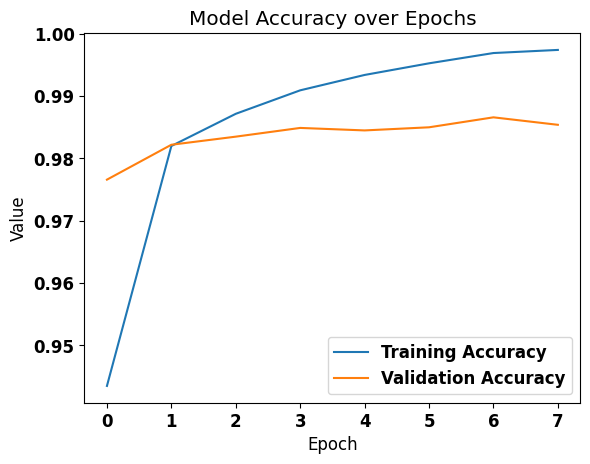

In [11]:
###################################
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss*100))
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_ylabel('Value')
ax.set_xlabel('Epoch')
ax.set_title('Model Loss over Epochs')
ax.legend()
plt.show()

fig, ay = plt.subplots()
ay.plot(history.history['accuracy'], label='Training Accuracy')
ay.plot(history.history['val_accuracy'], label='Validation Accuracy')
ay.set_ylabel('Value')
ay.set_xlabel('Epoch')
ay.set_title('Model Accuracy over Epochs')
ay.legend()
plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


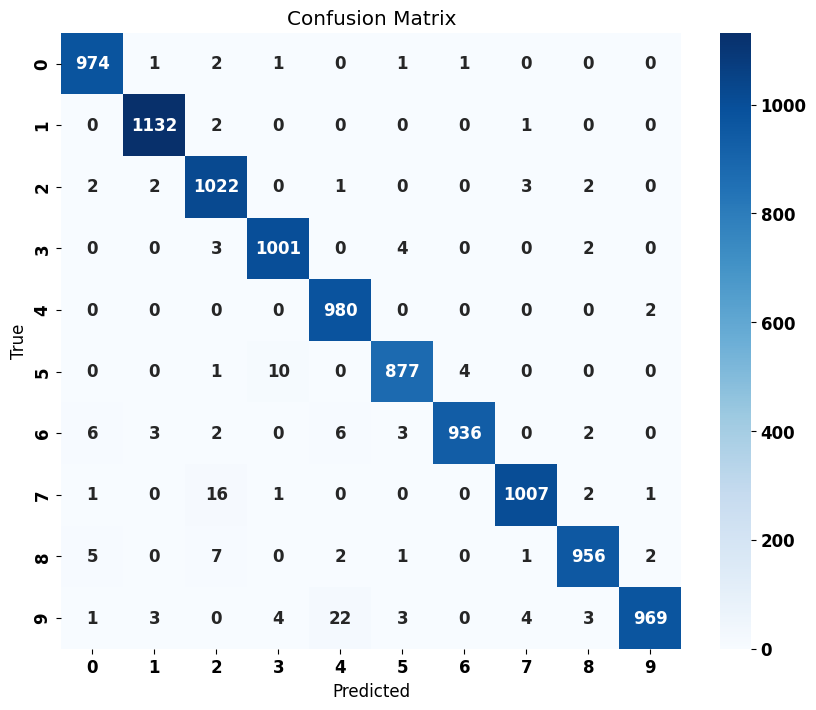

In [12]:
###################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

#List of class labels for MNIST (0-9)
labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) #convert predictions to class labels

#Get true class labels
y_true = np.argmax(y_test, axis=1)

#compute the confusion matrix
cm=confusion_matrix(y_true, y_pred_classes)

#plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

**I already did it above. I change the batch size and the number of epoch to avoid overfitting**
